In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import csv
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [3]:
#read in our data from the two separate files
dfAmazon = pd.read_csv(r'/Users/alison/Desktop/Amazon Ratings.csv')
dfBarnes = pd.read_csv(r'/Users/alison/Desktop/Barnes and Noble Ratings.csv')

In [4]:
#check for NAs and replace all NA values with blanks
dfBarnes.fillna('', inplace=True)

In [5]:
#create new columns for whether the book is a movie, or not
movie = [False, False, True, True, False, False, False, True, False, False, True, True, False, True, True, False, True, False, False, False]
dfAmazon['MovieTV'] = movie
dfBarnes['MovieTV'] = movie


In [6]:
#examine amazon df structures
count_row = dfAmazon.shape[0]
count_col = dfAmazon.shape[1]
#examine barnes df structures
count_row2 = dfBarnes.shape[0]
count_col2 = dfBarnes.shape[1]

In [7]:
#examine amazon row structures
count_row

20

In [8]:
#examine amazon column structures
count_col

17

In [9]:
#examine barnes row structures
count_row2

20

In [10]:
#examine barnes column structures
count_col2

17

In [11]:
dfAmazon

,Title,Author,Genre,Year Published,Average rating,# of 5 stars,# of 4 stars,# of 3 stars,# of 2 stars,# of 1 stars,5 star comment,4 star comment,3 star comment,2 star comment,1 star comment,Reason for ban,MovieTV
0,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,Young adult fiction,2009,4.6,4546,905,359,109,188,Powerful story about how your culture and her...,Illustrated strory of living between 2 worlds\...,Caution: adolescent juvenile content and foul...,Was not an enjoyable book. He just rambled on ...,Inappropriate Sexual Themes throughout Book\nR...,"violence, Language, and some sexual content.",False
1,Captain Underpants (book 1),Dav Pilkey,Children's literature,1997,4.8,2902,330,123,33,63,Around when I was in third grade and all the o...,This story is very relatable for young childre...,Not sure what to say...As a 74 yr. old preview...,I see why children love these books.\nThis is...,A McDonald's kid's meal for the child's mind\...,"Offensive Language, Partial Nudity, Violence, ...",False
2,Thirteen Reasons Why,Jay Asher,Young adult fiction,2011,4.5,8520,1916,938,392,491,This was a reread for me and I'm so glad I div...,"Powerful! This book was a ""must read"" recommen...",I remember reading the beginning in middle sch...,The one thing I like about this story is the c...,Terrible message. This book chronicles all the...,"drugs, alcohol, smoking, being sexually expli...",True
3,Looking for Alaska,John Green,Young adult fiction,2005,4.6,9709,2332,1004,357,341,I got this book because I'd read Green's other...,I read this first in college for a young adult...,I bought this for my nephew last Christmas. He...,"Ok, I Found Alaska, Now I Wish I Hadn't\nI'm n...",I usually enjoy reading John Green. I am sad t...,"sexually explicit, smoking, profanity",True
4,George,Alex Gino,"LGBT, children's fiction, transgender",2015,4.7,1040,154,47,23,41,"This book was recently denounced by the ""Milli...",I loved the strong voice of the narrator and h...,I initially picked up this book after seeing i...,This book is being sold as an elementary book....,The story was rather boring and not exceptiona...,sexual references and language considered to b...,False
5,And Tango Makes Three,Justin Richardson and Peter Parnell,Children's literature,2005,4.9,1811,120,27,6,56,My husband and I bought this for our daughter ...,A cute story to introduce different types of f...,Just got around to this story - I've heard abo...,If you want to indocrinate your children with ...,This is a story about homosexual penguins. The...,"“unsuitable for young children” and has ""homos...",False
6,Drama,Raina Telgemeier,Graphic novel,2012,4.7,7917,837,304,114,486,I would like to personally thank all of the pa...,"I am 12 years old, and a sixth grade girl. Man...",I’m glad that society is opening up about sexu...,This book contains mature information about di...,I DO NOT APPROVE OF HAVING TWO BOYS FALL IN LO...,Challenged for LGBTQIA+ content and for concer...,False
7,Fifty Shades of Grey,E. L. James,Erotic romance novel,2011,4.0,30221,6191,5451,4246,10861,This is the third time I've read this; each ti...,"Okay. To begin with, if you are wondering if t...",I had heard women buzzing all over town about ...,Given what I'd heard about this book I expecte...,"This concept could have really worked, but it ...","sexually explicit, unsuited to age group, and ...",True
8,Internet Girls (series),Lauren Myracle,young adult novel series,2005,4.3,102,33,20,11,54,IF YOU ARE MATURE AND HAVE HAD A GOOD UPBRINGI...,I see a lot of parents on here saying this boo...,Let me be honest: I picked this book up solely...,"As a librarian, I try to read reviews before o...",I got this book for a masters course on adoles...,offensive language and sexually explicit content,False
9,The Bluest Eye,Toni Morrison,African-American literature,1970,4.6,6591,1214,599,190,253,This book is really difficult to read if you'r...,Toni Morrison's “The Bluest Eye” is a unique n...,While Toni Morrison

In [12]:
dfBarnes

,Title,Author,Genre,Year Published,Average Rating,# of 5 stars,# of 4 stars,# of 3 stars,# of 2 stars,# of 1 stars,5 star comment,4 star comment,3 star comment,2 star comment,1 star comment,Reason for ban,MovieTV
0,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,Young adult fiction,2009,4,209,91,17,14,22,Good Book\nJunior Lives on an Indian Reservati...,This book was so good! My son is reading this ...,"Enjoyed it, very strong and powerful story. To...",Good for Diary style of writing--would have wi...,This review is about The Absolutely True Diary...,"violence, Language, and some sexual content.",False
1,Captain Underpants (series),Dav Pilkey,Children's literature,1997,5,32,6,2,2,2,I would be lying to you if I said I didn't gro...,,This is an old one and one I remembered readin...,I Hare It Bo!,,"Offensive Language, Partial Nudity, Violence, ...",False
2,Thirteen Reasons Why,Jay Asher,Young adult fiction,2011,5,2696,602,237,106,159,"In Jay Asher's 13 Reasons Why, he shows the wo...",13 Reasons Why is a book written by Jay Asher ...,It was ok. kind of boring at times. And i just...,I would like to say I like this book that our ...,It was the most disappointing book I have ever...,"drugs, alcohol, smoking, being sexually expli...",True
3,Looking for Alaska,John Green,Young adult fiction,2005,5,1222,276,108,38,52,"Not only is John Green my favorite author, he ...",It was an endearing book. You liked the narrat...,"Miles, ironically dubbed Pudge by his new boar...",think this book was a little shallow in conte...,"I'm sorry, but this book was pretty awful. Fir...","sexually explicit, smoking, profanity",True
4,George,Alex Gino,"LGBT, children's fiction, transgender",2015,4,12,4,1,0,2,Alex Gino has written a masterpiece that will ...,While this is intended for a younger audience ...,,,"Right off the bat, this book is clearly geared...",sexual references and language considered to b...,False
5,And Tango Makes Three,Justin Richardson and Peter Parnell,Children's literature,2005,5,22,2,1,2,0,We read this book in a children's literature c...,This is a very simple book. The illustrations ...,,,,"“unsuitable for young children” and has ""homos...",False
6,Drama,Raina Telgemeier,Graphic novel,2012,4,47,5,6,2,11,This book is so great I have no words to descr...,"this is a great book. only thing is, i wouldnt...","A nice, sweet read for middle school readers. ...",it was ok the book lacked of detail. and you r...,I would give this a zero if available. Some el...,Challenged for LGBTQIA+ content and for concer...,False
7,Fifty Shades of Grey,E. L. James,Erotic romance novel,2011,4,7223,2019,1259,658,1546,This was the first book I ever read in the Rom...,"Easy To Read. Grabs your attention, you cant h...","It was an alright read, repetitive which is on...",It was interesting enough for me to finish the...,The only reason I finished reading this book i...,"sexually explicit, unsuited to age group, and ...",True
8,Internet Girls (series),Lauren Myracle,young adult novel series,2005,4,2,1,1,0,0,Read this before and had to read it again love...,I remember seeing this book in the bookstore w...,Kiss you hand three times then post this for t...,,,offensive language and sexually explicit content,False
9,The Bluest Eye,Toni Morrison,African-American literature,1970,4,99,55,35,11,14,I struggled with this book. The book opens as ...,I read this novel to fill a gap in my literary...,The varying perspectives were interesting; alt...,I wouldn’t recommend The Bluest Eye to just an...,I must say I did not enjoy this book at all. H...,sexually explicit and depicts child sexual abuse,False


In [5]:
#calculate average rating for the amazon df
aveRatingAmazon = dfAmazon['Average rating'].sum()/20
aveRatingAmazon = round(aveRatingAmazon,2)
aveRatingAmazon

4.64

In [6]:
#calculate average rating for the barnes and noble df
aveRatingBarnes = dfBarnes['Average Rating'].sum()/20
aveRatingBarnes = round(aveRatingBarnes,2)
aveRatingBarnes

4.6

In [7]:
#create function calculating the frequency of each genre
genreDict = {}
for i in dfAmazon.index:
    if(dfAmazon['Genre'][i] in genreDict):
        genreDict[dfAmazon['Genre'][i]] += 1
    else:
        genreDict[dfAmazon['Genre'][i]] = 1
genreDict

{'Young adult fiction': 6,
 "Children's literature ": 3,
 "LGBT, children's fiction, transgender": 1,
 "Children's literature": 1,
 'Graphic novel': 3,
 'Erotic romance novel': 1,
 'young adult novel series': 1,
 'African-American literature': 1,
 'Asian American Literature and Fiction': 1,
 'Classic American Literature': 1,
 'Memoir': 1}

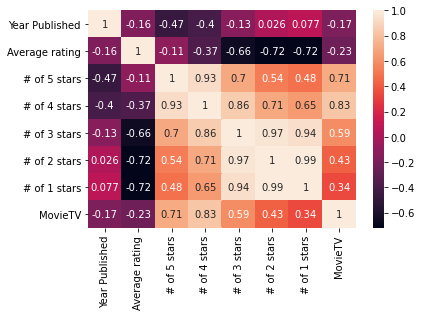

In [8]:
#create correlation matrix for amazon
corrMatrixA = dfAmazon.corr()
#print(corrMatrixA)
sn.heatmap(corrMatrixA, annot=True)
plt.show()

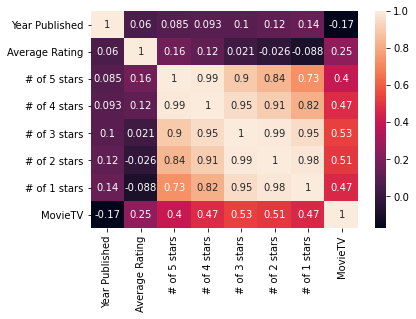

In [10]:
#creating correlation matrix for Barnes and Noble
corrMatrixB = dfBarnes.corr()
#print(corrMatrixB)
sn.heatmap(corrMatrixB, annot=True)
plt.show()

In [13]:
#cleans and preps the Amazon data for sentiment analysis
nltk.download('stopwords')
dfAmazon['5 star comment'] = dfAmazon['5 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAmazon['4 star comment'] = dfAmazon['4 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAmazon['3 star comment'] = dfAmazon['3 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAmazon['2 star comment'] = dfAmazon['2 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAmazon['1 star comment'] = dfAmazon['1 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfAmazon['Reason for ban'] = dfAmazon['Reason for ban'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#print(dfAmazon['5 star comment'][0])
stop = stopwords.words('english')
dfAmazon['5 star comment'] = dfAmazon['5 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfAmazon['4 star comment'] = dfAmazon['4 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfAmazon['3 star comment'] = dfAmazon['3 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfAmazon['2 star comment'] = dfAmazon['2 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfAmazon['1 star comment'] = dfAmazon['1 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfAmazon['Reason for ban'] = dfAmazon['Reason for ban'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#print(dfAmazon['5 star comment'][0])

#sentiment analysis function
def senti(x):
    return TextBlob(x).sentiment  

#creates column in Amazon df that applies the sentiment analysis
dfAmazon['senti_score_5star'] = dfAmazon['5 star comment'].apply(senti)
dfAmazon['senti_score_4star'] = dfAmazon['4 star comment'].apply(senti)
dfAmazon['senti_score_3star'] = dfAmazon['3 star comment'].apply(senti)
dfAmazon['senti_score_2star'] = dfAmazon['2 star comment'].apply(senti)
dfAmazon['senti_score_1star'] = dfAmazon['1 star comment'].apply(senti)
dfAmazon['senti_score_Ban'] = dfAmazon['Reason for ban'].apply(senti)

#creates a list of sentiment for the 5 star comment column
sent5star = []
pos5 = 0
neu5 = 0
neg5 = 0
for score in dfAmazon.senti_score_5star:
    if score[0] < 0:
        sent5star.append('negative')
        neg5 +=1
    elif score[0] > 0:
        sent5star.append('positive')
        pos5 +=1
    else:
        sent5star.append('neutral')
        neu5 +=1

#assigns the list to a column in the Amazon df
dfAmazon['sent5star'] = sent5star
#print(dfAmazon['sent5star'])
print()

#creates a list of sentiment for the 4 star comment column
sent4star = []
pos4 = 0
neu4 = 0
neg4 = 0
for score in dfAmazon.senti_score_4star:
    if score[0] < 0:
        sent4star.append('negative')
        neg4 +=1
    elif score[0] > 0:
        sent4star.append('positive')
        pos4 +=1
    else:
        sent4star.append('neutral')
        neu4 +=1

#assigns the list to a column in the Amazon df
dfAmazon['sent4star'] = sent4star
#print(dfAmazon['sent4star'])
print()

#creates a list of sentiment for the 3 star comment column
sent3star = []
pos3 = 0
neu3 = 0
neg3 = 0
for score in dfAmazon.senti_score_3star:
    if score[0] < 0:
        sent3star.append('negative')
        neg3 +=1
    elif score[0] > 0:
        sent3star.append('positive')
        pos3 +=1
    else:
        sent3star.append('neutral')
        neu3+=1

#assigns the list to a column in the Amazon df
dfAmazon['sent3star'] = sent3star
#print(dfAmazon['sent3star'])
print()

#creates a list of sentiment for the 1 star comment column
sent2star = []
pos2 = 0
neu2 = 0
neg2 = 0
for score in dfAmazon.senti_score_2star:
    if score[0] < 0:
        sent2star.append('negative')
        neg2 +=1
    elif score[0] > 0:
        sent2star.append('positive')
        pos2 +=1
    else:
        sent2star.append('neutral')
        neu2 +=1

#assigns the list to a column in the Amazon df
dfAmazon['sent2star'] = sent2star
#print(dfAmazon['sent2star'])

#creates a list of sentiment for the 1 star comment column
sent1star = []
pos1 = 0
neu1 = 0
neg1 = 0
for score in dfAmazon.senti_score_1star:
    if score[0] < 0:
        sent1star.append('negative')
        neg1 +=1
    elif score[0] > 0:
        sent1star.append('positive')
        pos1 +=1
    else:
        sent1star.append('neutral')
        neu1 +=1

#assigns the list to a column in the Amazon df
dfAmazon['sent1star'] = sent1star
#print(dfAmazon['sent1star'])

#print()
#print(neg1)
#print(neu3)
#print(pos5)


#print(pos5, pos4, pos3, pos2, pos1)
#print(neu5, neu4, neu3, neu2, neu1)
#print(neg5, neg4, neg3, neg2, neg1)

#Amazon
#14 15 13 12 8
#2 2 2 2 5
#4 3 5 6 7

#Barnes and Noble
#14 13 11 8 5
#5 5 7 9 7
#1 2 2 3 8


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alison/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


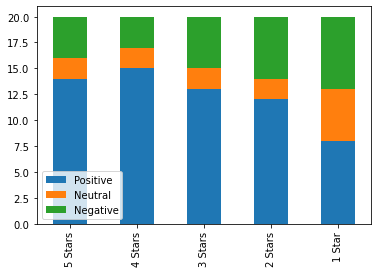

In [49]:
#creates dataframe to be used to make a stacked barplot of the sentiment for Amazon
positive = [pos5, pos4, pos3, pos2, pos1]
neutral = [neu5, neu4, neu3, neu2, neu1]
negative = [neg5, neg4, neg3, neg2, neg1]
index = ['5 Stars', '4 Stars', '3 Stars',
         '2 Stars', '1 Star']
df = pd.DataFrame({'Positive': positive,
                   'Neutral': neutral, 'Negative':negative}, index=index)
#ax = df.plot.bar(rot=0)
ax = df.plot.bar(stacked=True)
#ax = df.plot.bar(stacked=True, color=['limegreen', 'orange', 'firebrick'])
plt.legend(loc='lower left')


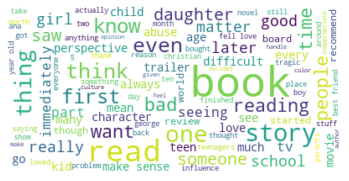

In [19]:
# Start with one review:
text = " ".join(review for review in dfAmazon['5 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

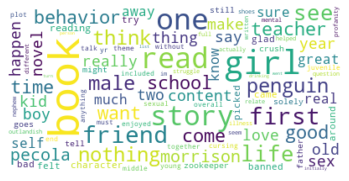

In [20]:
text = " ".join(review for review in dfAmazon['3 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

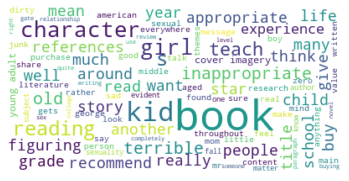

In [21]:
text = " ".join(review for review in dfAmazon['1 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

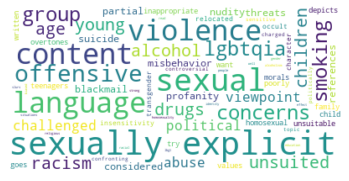

In [22]:
text = " ".join(review for review in dfAmazon['Reason for ban'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#note: added A
#most frequent words for Amazon reviews
#dictionary where the keys are the words and the values are the frequency
dict5StarA = {}
for i in dfAmazon.index:
    comment = dfAmazon['5 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict5StarA):
            dict5StarA[c] += 1
        else:
            dict5StarA[c] = 1

dict4StarA = {}
for i in dfAmazon.index:
    comment = dfAmazon['4 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict4StarA):
            dict4StarA[c] += 1
        else:
            dict4StarA[c] = 1
        

dict3StarA = {}
for i in dfAmazon.index:
    comment = dfAmazon['3 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict3StarA):
            dict3StarA[c] += 1
        else:
            dict3StarA[c] = 1

dict2StarA = {}
for i in dfAmazon.index:
    comment = dfAmazon['2 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict2StarA):
            dict2StarA[c] += 1
        else:
            dict2StarA[c] = 1

dict1StarA = {}
for i in dfAmazon.index:
    comment = dfAmazon['1 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict1StarA):
            dict1StarA[c] += 1
        else:
            dict1StarA[c] = 1

dictBanA = {}
for i in dfAmazon.index:
    comment = dfAmazon['Reason for ban'][i]
    comment = comment.split()
    for c in comment:
        if (c in dictBanA):
            dictBanA[c] += 1
        else:
            dictBanA[c] = 1
 


In [15]:
#Counter is used to find the highest value key and values
from collections import Counter
#import heapq 
#print(heapq.nlargest(10,dict3Star.values()))

#takes the dictionary and finds the 10 most common values
star1 = Counter(dict1StarA)
high1 = star1.most_common(10)
print("1 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high1:
    print(i[0]," :", i[1], " ")

print()
#takes the dictionary and finds the 10 most common values
star2 = Counter(dict2StarA)
high2 = star2.most_common(10)
print("2 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high2:
    print(i[0]," :", i[1], " ")

print()
#takes the dictionary and finds the 10 most common values
star3 = Counter(dict3StarA)
high3 = star3.most_common(10)
print("3 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high3:
    print(i[0]," :", i[1], " ")

print()
#takes the dictionary and finds the 10 most common values
star4 = Counter(dict4StarA)
high4 = star4.most_common(10)
print("4 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high4:
    print(i[0]," :", i[1], " ")

print()
#takes the dictionary and finds the 10 most common values
star5 = Counter(dict5StarA)
high5 = star5.most_common(10)
print("5 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high5:
    print(i[0]," :", i[1], " ")

print()
#takes the dictionary and finds the 10 most common values
bans = Counter(dictBanA)
highBan = bans.most_common(10)
print("Banned Reason Keys with 10 highest values:")
print("Keys: Values")
for i in highBan:
    print(i[0]," :", i[1], " ")

1 Star Rating Keys with 10 highest values:
Keys: Values
book  : 25  
would  : 9  
kids  : 8  
reading  : 6  
book.  : 5  
teach  : 5  
like  : 4  
young  : 4  
character  : 4  
could  : 4  

2 Star Rating Keys with 10 highest values:
Keys: Values
book  : 26  
read  : 9  
kids  : 9  
book.  : 8  
like  : 7  
good  : 7  
children  : 5  
love  : 5  
think  : 5  
would  : 4  

3 Star Rating Keys with 10 highest values:
Keys: Values
book  : 22  
one  : 13  
girls  : 9  
read  : 8  
first  : 8  
see  : 7  
story  : 7  
think  : 6  
nothing  : 6  
school  : 5  

4 Star Rating Keys with 10 highest values:
Keys: Values
book  : 30  
read  : 13  
young  : 11  
would  : 11  
story  : 11  
book.  : 9  
little  : 6  
much  : 6  
think  : 6  
life  : 5  

5 Star Rating Keys with 10 highest values:
Keys: Values
book  : 25  
read  : 17  
story  : 9  
think  : 9  
it.  : 9  
even  : 9  
reading  : 7  
like  : 7  
would  : 7  
books  : 7  

Banned Reason Keys with 10 highest values:
Keys: Values
sexually

In [16]:
#cleans and preps the Barnes and Noble data for sentiment analysis
nltk.download('stopwords')
dfBarnes['5 star comment'] = dfBarnes['5 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfBarnes['4 star comment'] = dfBarnes['4 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfBarnes['3 star comment'] = dfBarnes['3 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfBarnes['2 star comment'] = dfBarnes['2 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfBarnes['1 star comment'] = dfBarnes['1 star comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfBarnes['Reason for ban'] = dfBarnes['Reason for ban'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removes stopwords
stop = stopwords.words('english')
dfBarnes['5 star comment'] = dfBarnes['5 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfBarnes['4 star comment'] = dfBarnes['4 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfBarnes['3 star comment'] = dfBarnes['3 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfBarnes['2 star comment'] = dfBarnes['2 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfBarnes['1 star comment'] = dfBarnes['1 star comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfBarnes['Reason for ban'] = dfBarnes['Reason for ban'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#print(dfAmazon['5 star comment'][0])

#sentiment analysis function
def senti(x):
    return TextBlob(x).sentiment  

#creates column in Barnes and Noble df that applies the sentiment analysis
dfBarnes['senti_score_5star'] = dfBarnes['5 star comment'].apply(senti)
dfBarnes['senti_score_4star'] = dfBarnes['4 star comment'].apply(senti)
dfBarnes['senti_score_3star'] = dfBarnes['3 star comment'].apply(senti)
dfBarnes['senti_score_2star'] = dfBarnes['2 star comment'].apply(senti)
dfBarnes['senti_score_1star'] = dfBarnes['1 star comment'].apply(senti)
dfBarnes['senti_score_Ban'] = dfBarnes['Reason for ban'].apply(senti)

#creates a list of sentiment for the 5 star comment column
sent5star = []
pos5 = 0
neu5 = 0
neg5 = 0
for score in dfBarnes.senti_score_5star:
    if score[0] < 0:
        sent5star.append('negative')
        neg5 +=1
    elif score[0] > 0:
        sent5star.append('positive')
        pos5 +=1
    else:
        sent5star.append('neutral')
        neu5 +=1

#assigns the list to a column in the Barnes amd Noble df
dfBarnes['sent5star'] = sent5star
#print(dfBarnes['sent5star'])
#print()

#creates a list of sentiment for the 4 star comment column
sent4star = []
pos4 = 0
neu4 = 0
neg4 = 0
for score in dfBarnes.senti_score_4star:
    if score[0] < 0:
        sent4star.append('negative')
        neg4 +=1
    elif score[0] > 0:
        sent4star.append('positive')
        pos4 +=1
    else:
        sent4star.append('neutral')
        neu4 +=1

#assigns the list to a column in the Barnes amd Noble df
dfBarnes['sent4star'] = sent4star
#print(dfBarnes['sent5star'])
#print()

#creates a list of sentiment for the 3 star comment column
sent3star = []
pos3 = 0
neu3 = 0
neg3 = 0
for score in dfBarnes.senti_score_3star:
    if score[0] < 0:
        sent3star.append('negative')
        neg3 +=1
    elif score[0] > 0:
        sent3star.append('positive')
        pos3 +=1
    else:
        sent3star.append('neutral')
        neu3+=1

#assigns the list to a column in the Barnes amd Noble df
dfBarnes['sent3star'] = sent3star
#print(dfBarnes['sent3star'])
#print()

#creates a list of sentiment for the 2 star comment column
sent2star = []
pos2 = 0
neu2 = 0
neg2 = 0
for score in dfBarnes.senti_score_2star:
    if score[0] < 0:
        sent2star.append('negative')
        neg2 +=1
    elif score[0] > 0:
        sent2star.append('positive')
        pos2 +=1
    else:
        sent2star.append('neutral')
        neu2+=1

#assigns the list to a column in the Barnes amd Noble df
dfBarnes['sent2star'] = sent2star
#print(dfBarnes['sent3star'])
#print()

#creates a list of sentiment for the 1 star comment column
sent1star = []
pos1 = 0
neu1 = 0
neg1 = 0
for score in dfBarnes.senti_score_1star:
    if score[0] < 0:
        sent1star.append('negative')
        neg1 +=1
    elif score[0] > 0:
        sent1star.append('positive')
        pos1 +=1
    else:
        sent1star.append('neutral')
        neu1 +=1

#assigns the list to a column in the Barnes amd Noble df
dfBarnes['sent1star'] = sent1star
#print(dfBarnes['sent1star'])

#print()
#print(neg1)
#print(neu3)
#print(pos5)

#print(pos5, pos4, pos3, pos2, pos1)
#print(neu5, neu4, neu3, neu2, neu1)
#print(neg5, neg4, neg3, neg2, neg1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alison/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


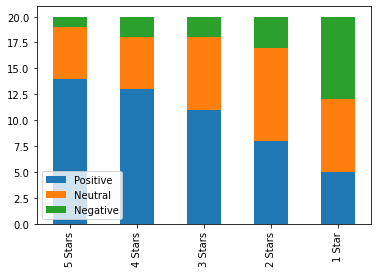

In [44]:
#takes the number of positive, neutral, and negative values and puts it into a dataframe in order to create stacked barplot
positive = [pos5, pos4, pos3, pos2, pos1]
neutral = [neu5, neu4, neu3, neu2, neu1]
negative = [neg5, neg4, neg3, neg2, neg1]
index = ['5 Stars', '4 Stars', '3 Stars',
         '2 Stars', '1 Star']
df = pd.DataFrame({'Positive': positive,
                   'Neutral': neutral, 'Negative':negative}, index=index)
#ax = df.plot.bar(rot=0)
ax = df.plot.bar(stacked=True)
plt.legend(loc='lower left')

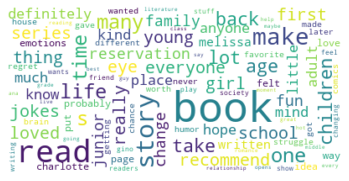

In [23]:
# Start with one review:
text = " ".join(review for review in dfBarnes['5 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

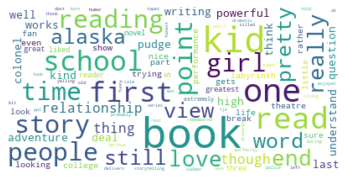

In [24]:
text = " ".join(review for review in dfBarnes['3 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

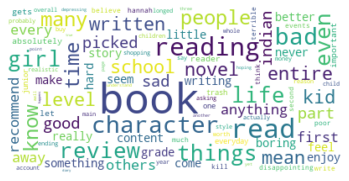

In [25]:
text = " ".join(review for review in dfBarnes['1 star comment'].astype(str))
#text = dfAmazon['5 star comment']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#note: added B
#most frequent words for Barnes and Noble for each star rating
dict5StarB = {}
for i in dfBarnes.index:
    comment = dfBarnes['5 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict5StarB):
            dict5StarB[c] += 1
        else:
            dict5StarB[c] = 1

dict4StarB = {}
for i in dfBarnes.index:
    comment = dfBarnes['4 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict4StarB):
            dict4StarB[c] += 1
        else:
            dict4StarB[c] = 1
        

dict3StarB = {}
for i in dfBarnes.index:
    comment = dfBarnes['3 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict3StarB):
            dict3StarB[c] += 1
        else:
            dict3StarB[c] = 1

dict2StarB = {}
for i in dfBarnes.index:
    comment = dfBarnes['2 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict2StarB):
            dict2StarB[c] += 1
        else:
            dict2StarB[c] = 1

dict1StarB = {}
for i in dfBarnes.index:
    comment = dfBarnes['1 star comment'][i]
    comment = comment.split()
    for c in comment:
        if (c in dict1StarB):
            dict1StarB[c] += 1
        else:
            dict1StarB[c] = 1

dictBanB = {}
for i in dfBarnes.index:
    comment = dfBarnes['Reason for ban'][i]
    comment = comment.split()
    for c in comment:
        if (c in dictBanB):
            dictBanB[c] += 1
        else:
            dictBanB[c] = 1
 


In [19]:
#like before, Counter is used to find the most common values in each dictionary
from collections import Counter

star1B = Counter(dict1StarB)
high1B = star1B.most_common(10)
print("1 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high1B:
    print(i[0]," :", i[1], " ")

print()
star2B = Counter(dict2StarB)
high2B = star2B.most_common(10)
print("2 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high2B:
    print(i[0]," :", i[1], " ")

print()
star3B = Counter(dict3StarB)
high3B = star3B.most_common(10)
print("3 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high3B:
    print(i[0]," :", i[1], " ")

print()
star4B = Counter(dict4StarB)
high4B = star4B.most_common(10)
print("4 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high4B:
    print(i[0]," :", i[1], " ")

print()
star5B = Counter(dict5StarB)
high5B = star5B.most_common(10)
print("5 Star Rating Keys with 10 highest values:")
print("Keys: Values")
for i in high5B:
    print(i[0]," :", i[1], " ")

print()
bansB = Counter(dictBanB)
highBanB = bans.most_common(10)
print("Banned Reason Keys with 10 highest values:")
print("Keys: Values")
for i in highBanB:
    print(i[0]," :", i[1], " ")

1 Star Rating Keys with 10 highest values:
Keys: Values
book  : 21  
book.  : 8  
would  : 8  
reading  : 7  
things  : 6  
get  : 6  
even  : 6  
read  : 6  
many  : 5  
like  : 5  

2 Star Rating Keys with 10 highest values:
Keys: Values
book  : 15  
read  : 6  
like  : 5  
page  : 4  
good  : 3  
native  : 3  
however,  : 3  
teen  : 3  
reading  : 3  
took  : 3  

3 Star Rating Keys with 10 highest values:
Keys: Values
one  : 7  
kids  : 6  
book,  : 5  
first  : 5  
reading  : 4  
girl  : 4  
school  : 4  
like  : 4  
book  : 3  
would  : 3  

4 Star Rating Keys with 10 highest values:
Keys: Values
book  : 24  
read  : 13  
book.  : 8  
really  : 8  
good  : 7  
liked  : 7  
would  : 6  
people  : 5  
like  : 5  
reading  : 4  

5 Star Rating Keys with 10 highest values:
Keys: Values
book  : 19  
read  : 9  
make  : 7  
it.  : 7  
many  : 6  
would  : 5  
one  : 5  
story  : 5  
young  : 4  
like  : 4  

Banned Reason Keys with 10 highest values:
Keys: Values
sexually  : 8  
sexua